<a href="https://colab.research.google.com/github/pavanpendela/ppendela-64061/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AML-Assignment 1**

Neural Networks

The library tensorflow.keras.datasets is used to load the IMDB Dataset in the workspace

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# Decoding reviews back to text

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


Preparing the data

In [6]:
# Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building Model using Relu function

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [9]:
# Compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [10]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
# Training your model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5008 - accuracy: 0.7882 - val_loss: 0.4258 - val_accuracy: 0.8185
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2955 - accuracy: 0.9028 - val_loss: 0.2978 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2122 - accuracy: 0.9311 - val_loss: 0.2790 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1682 - accuracy: 0.9459 - val_loss: 0.2911 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1361 - accuracy: 0.9569 - val_loss: 0.2879 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1135 - accuracy: 0.9649 - val_loss: 0.3007 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0892 - accuracy: 0.9741 - val_loss: 0.3186 - val_accuracy: 0.8824
Epoch 8/20
30

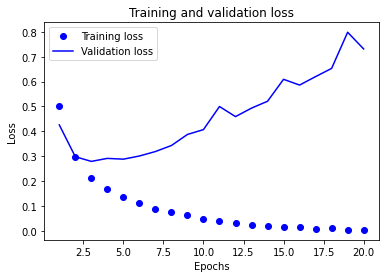

In [13]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

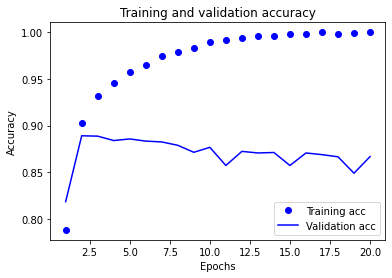

In [14]:
# Plotting the training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
# Retraining a model from scratch

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 51ms/step - loss: 0.4550 - accuracy: 0.8234
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2642 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2058 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.8834


**Q1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.**

In [16]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
# Training your model

history_11 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_12 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5485 - accuracy: 0.7651 - val_loss: 0.4179 - val_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3255 - accuracy: 0.8998 - val_loss: 0.3185 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2284 - accuracy: 0.9264 - val_loss: 0.2963 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1713 - accuracy: 0.9441 - val_loss: 0.2898 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1379 - accuracy: 0.9557 - val_loss: 0.3230 - val_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1147 - accuracy: 0.9646 - val_loss: 0.3562 - val_accuracy: 0.8696
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0931 - accuracy: 0.9728 - val_loss: 0.3425 - val_accuracy: 0.8776
Epoch 8/20
30

In [19]:
model_11.summary()
model_12.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)         

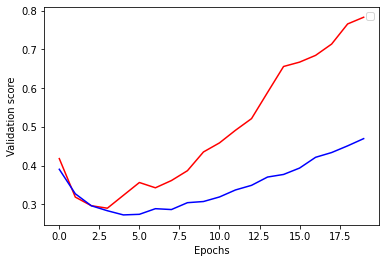

In [20]:
# Plotting the training and validation loss
history_dict_11 = history_11.history
history_dict_12 = history_12.history

plt.plot(history_11.history['val_loss'], 'r', history_12.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()

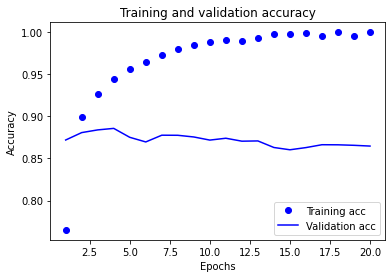

In [22]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_11["accuracy"]
val_acc = history_dict_11["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



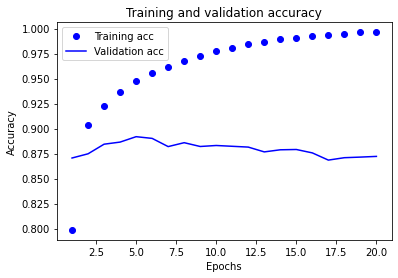

In [23]:
#-------------------------------------------
#plot_loss(history_dict_11.history['loss'], history_dict_11.history['val_loss'])
#-------------------------------------------

plt.clf()
acc = history_dict_12["accuracy"]
val_acc = history_dict_12["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.**

In [24]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [25]:
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [26]:
history_21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.4966 - accuracy: 0.7881 - val_loss: 0.3578 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2780 - accuracy: 0.9028 - val_loss: 0.2843 - val_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1983 - accuracy: 0.9323 - val_loss: 0.2749 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1503 - accuracy: 0.9487 - val_loss: 0.3649 - val_accuracy: 0.8602
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1213 - accuracy: 0.9581 - val_loss: 0.3446 - val_accuracy: 0.8711
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0963 - accuracy: 0.9685 - val_loss: 0.3873 - val_accuracy: 0.8700
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 0.3550 - val_accuracy: 0.8834
Epoch 8/20
30

In [27]:
model_21.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                320032    
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 322,209
Trainable params: 322,209
Non-trainable params: 0
_________________________________________________________________


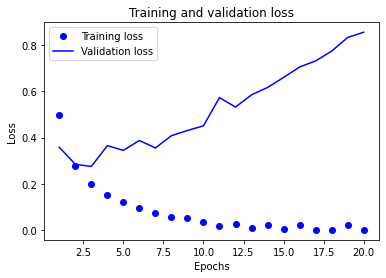

In [28]:
history_dict_21 = history_21.history
loss_values = history_dict_21["loss"]
val_loss_values = history_dict_21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

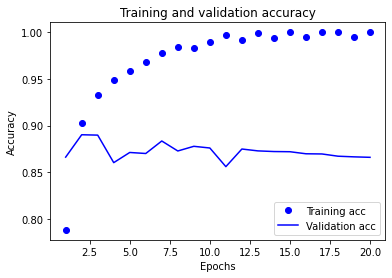

In [30]:
plt.clf()
acc = history_dict_21["accuracy"]
val_acc = history_dict_21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**3. Try using the 'mse' loss function instead of 'binary_crossentropy'.**

In [31]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [32]:
model_3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [33]:
# Training your model

history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 82ms/step - loss: 0.1680 - accuracy: 0.7881 - val_loss: 0.1186 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0877 - accuracy: 0.9059 - val_loss: 0.0926 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0604 - accuracy: 0.9335 - val_loss: 0.0863 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0470 - accuracy: 0.9487 - val_loss: 0.0875 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0371 - accuracy: 0.9603 - val_loss: 0.0836 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0290 - accuracy: 0.9714 - val_loss: 0.0858 - val_accuracy: 0.8813
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0257 - accuracy: 0.9755 - val_loss: 0.0881 - val_accuracy: 0.8813
Epoch 8/20
30

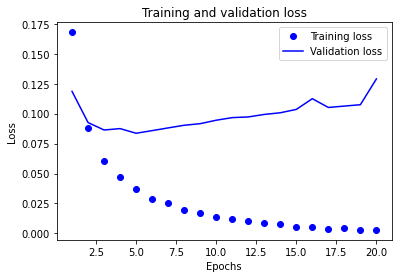

In [34]:
history_dict_3 = history_3.history
loss_values = history_dict_3["loss"]
val_loss_values = history_dict_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

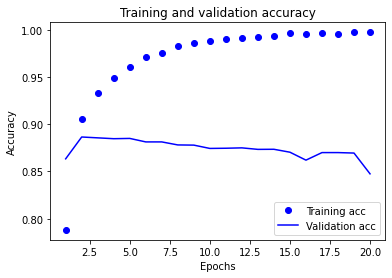

In [35]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_3["accuracy"]
val_acc = history_dict_3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'**

In [36]:
model_4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [37]:
model_4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [38]:
history_4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1561 - accuracy: 0.8019 - val_loss: 0.1167 - val_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0820 - accuracy: 0.9071 - val_loss: 0.0865 - val_accuracy: 0.8916
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0561 - accuracy: 0.9352 - val_loss: 0.0841 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0409 - accuracy: 0.9527 - val_loss: 0.0834 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0327 - accuracy: 0.9634 - val_loss: 0.0860 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0253 - accuracy: 0.9718 - val_loss: 0.0975 - val_accuracy: 0.8729
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0200 - accuracy: 0.9777 - val_loss: 0.0951 - val_accuracy: 0.8770
Epoch 8/20
30

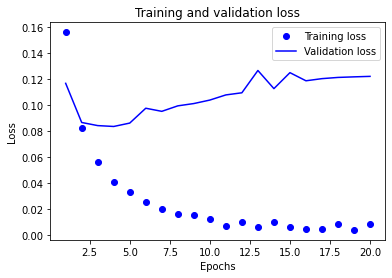

In [39]:
history_dict_4 = history_4.history
loss_values = history_dict_4["loss"]
val_loss_values = history_dict_4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

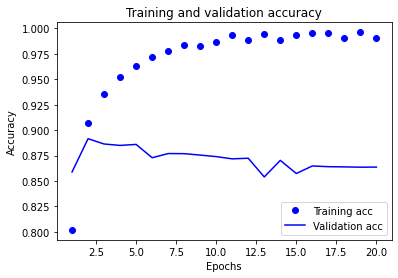

In [40]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_4["accuracy"]
val_acc = history_dict_4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.**

In [41]:
model_5 = keras.Sequential([
    #layers.Dropout(0.2),                        
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [42]:
# Compiling the model

model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [43]:
history_5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5340 - accuracy: 0.7641 - val_loss: 0.3796 - val_accuracy: 0.8730
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3327 - accuracy: 0.8821 - val_loss: 0.3013 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2482 - accuracy: 0.9120 - val_loss: 0.2749 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1953 - accuracy: 0.9322 - val_loss: 0.2863 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1610 - accuracy: 0.9461 - val_loss: 0.3384 - val_accuracy: 0.8674
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1365 - accuracy: 0.9532 - val_loss: 0.2910 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1085 - accuracy: 0.9641 - val_loss: 0.3233 - val_accuracy: 0.8810
Epoch 8/20
30

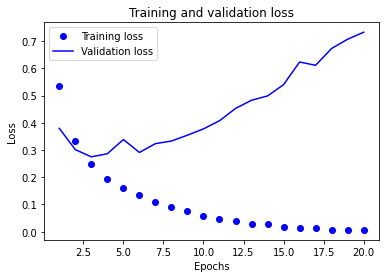

In [44]:
history_dict_5 = history_5.history
loss_values = history_dict_5["loss"]
val_loss_values = history_dict_5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

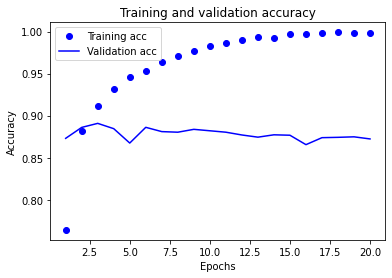

In [45]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_5["accuracy"]
val_acc = history_dict_5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()